Matrix A:
[[0.57754344 0.82768684 0.41721532 0.05478134 0.43737768]
 [0.95312744 0.65262834 0.46287835 0.92946662 0.09599811]
 [0.4512529  0.03841814 0.27149056 0.13618397 0.17348583]]

True optimal solution x_star: [1. 0. 0. 0. 0.]

Vector b = A @ x_star: [0.57754344 0.95312744 0.4512529 ]
grad=[-0.91044995 -0.6054726  -0.48654081 -0.6831532  -0.2085854 ]
values=[0.91044995 0.6054726  0.48654081 0.6831532  0.2085854 ]
min_index=0
vertices[min_idx]=[1. 0. 0. 0. 0.]
grad=[-0.30348332 -0.2018242  -0.16218027 -0.22771773 -0.06952847]
values=[0.30348332 0.2018242  0.16218027 0.22771773 0.06952847]
min_index=0
vertices[min_idx]=[1. 0. 0. 0. 0.]
grad=[-0.15174166 -0.1009121  -0.08109014 -0.11385887 -0.03476423]
values=[0.15174166 0.1009121  0.08109014 0.11385887 0.03476423]
min_index=0
vertices[min_idx]=[1. 0. 0. 0. 0.]
grad=[-0.09104499 -0.06054726 -0.04865408 -0.06831532 -0.02085854]
values=[0.09104499 0.06054726 0.04865408 0.06831532 0.02085854]
min_index=0
vertices[min_idx]=[1. 0. 0. 0. 

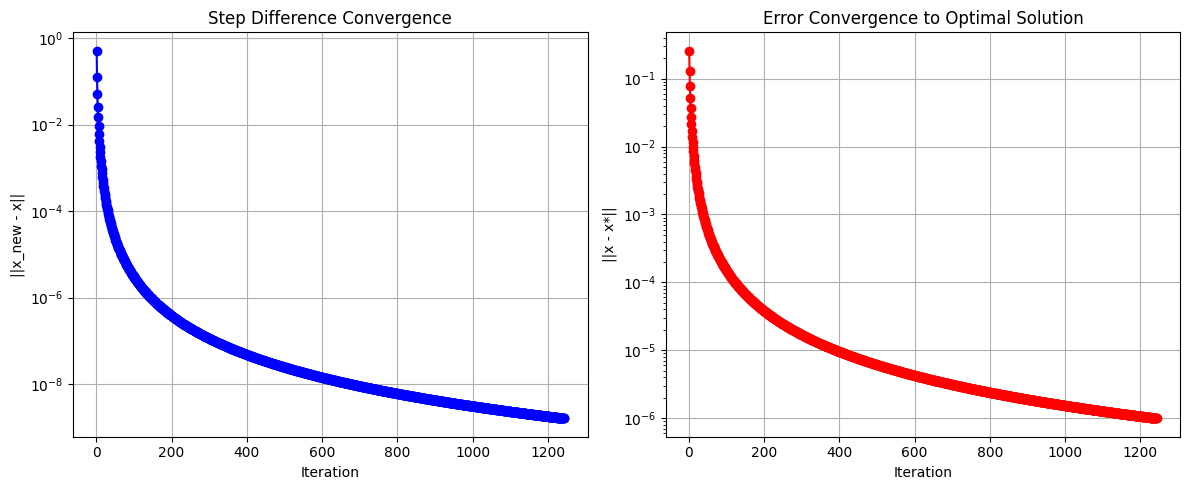


Computed optimal solution: [9.99999122e-01 1.50763132e-07 3.53210318e-07 1.26946518e-07
 2.46980258e-07]
Objective value at optimal_x: 2.5691811617601356e-13
Distance from x_star: 9.976525071610989e-07


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x, A, b):
    return np.linalg.norm(np.dot(A, x) - b) ** 2

def gradient(x, A, b):
    return 2 * np.dot(A.T, (np.dot(A, x) - b))

def linear_minimization(grad):
    print(f'grad={grad}')
    vertices = np.eye(len(grad))
    values = abs(grad)
    print(f'values={values}')
    max_index = np.argmax(values)
    print(f'max_index={max_index}')
    print(f'vertices[max_index]={vertices[max_index]}')
    return vertices[max_index]

def linear_minimizationII(grad):
    print(f'grad={grad}')
    vertices = np.eye(len(grad))
    values = abs(grad)
    print(f'values={values}')
    min_index = np.argmin(grad)
    print(f'min_index={min_index}')
    print(f'vertices[min_idx]={vertices[min_index]}')
    return vertices[min_index]

def frank_wolfe(x0, A, b, x_star, max_iters=10000, tol=1e-6):
    x = np.array(x0, dtype=np.float64)
    errors = []
    diffs = []
    
    for k in range(1, max_iters + 1):
        grad = gradient(x, A, b)
        s = linear_minimizationII(grad)
        step_size = 2.0 / (k + 2)
        x_new = x + step_size * (s - x)
        
        x_new = np.clip(x_new, 0.0, None)
        sum_x_new = x_new.sum()
        if sum_x_new > 1.0:
            x_new /= sum_x_new
        
        current_error = np.linalg.norm(x_new - x_star)
        errors.append(current_error)
        diff = np.linalg.norm(x_new - x)
        diffs.append(diff)
        
        if np.linalg.norm(x_star - x) < tol:
            x = x_new
            break
        x = x_new
    
    # Plotting
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.semilogy(range(1, len(diffs) + 1), diffs, marker='o', color='blue')
    plt.xlabel('Iteration')
    plt.ylabel('||x_new - x||')
    plt.title('Step Difference Convergence')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.semilogy(range(1, len(errors) + 1), errors, marker='o', color='red')
    plt.xlabel('Iteration')
    plt.ylabel('||x - x*||')
    plt.title('Error Convergence to Optimal Solution')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return x

# Generate data
n = 5  # Dimension of x
m = 3  # Dimension of b
A = np.random.rand(m, n)
x_star = np.zeros(n)  # Sparse optimal solution
x_star[0] = 1.0  # Set the first component to 1, others to 0
b = A @ x_star  # Set b as A * x_star

print("Matrix A:")
print(A)
print("\nTrue optimal solution x_star:", x_star)
print("\nVector b = A @ x_star:", b)

x0 = np.random.rand(n)
x0 /= x0.sum()

optimal_x = frank_wolfe(x0, A, b, x_star, max_iters=10000, tol=1e-6)

print("\nComputed optimal solution:", optimal_x)
print("Objective value at optimal_x:", objective_function(optimal_x, A, b))
print("Distance from x_star:", np.linalg.norm(optimal_x - x_star))